In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [2]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [3]:
pd.Series(y).value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Diabetic, dtype: float64

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


Unique values: 15


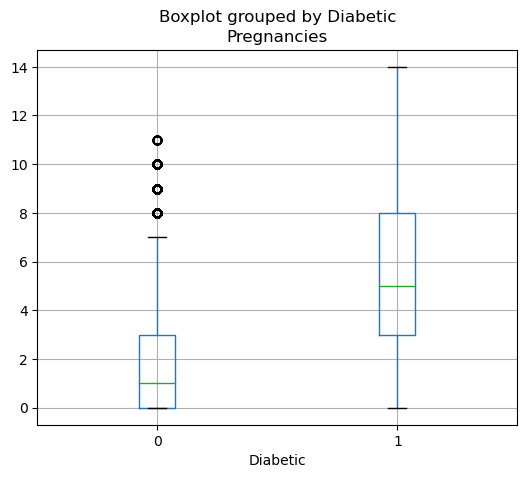

Unique values: 149


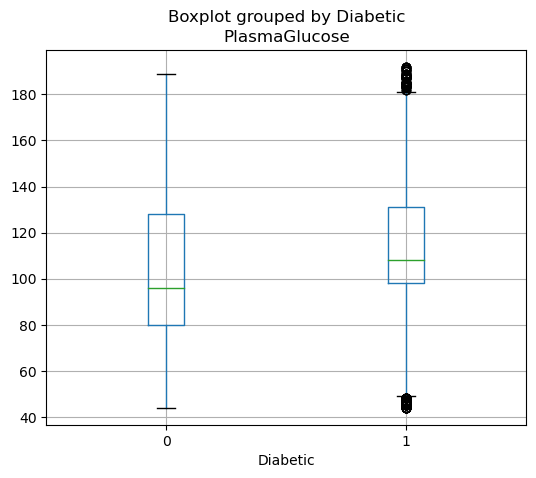

Unique values: 90


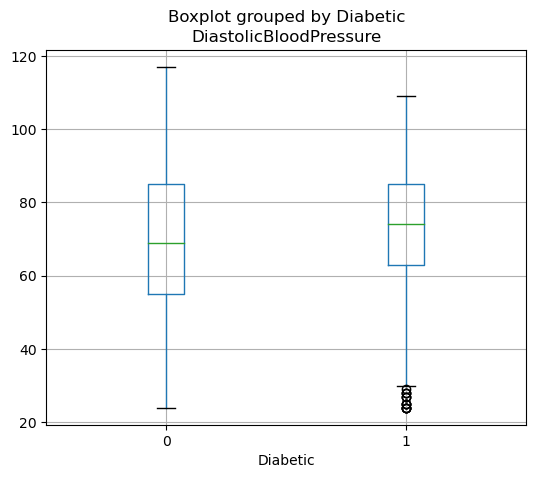

Unique values: 69


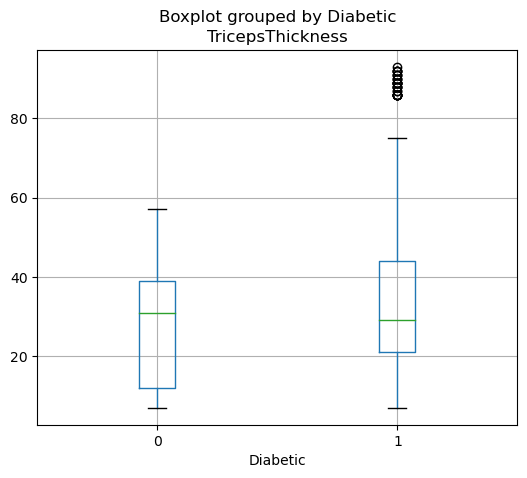

Unique values: 663


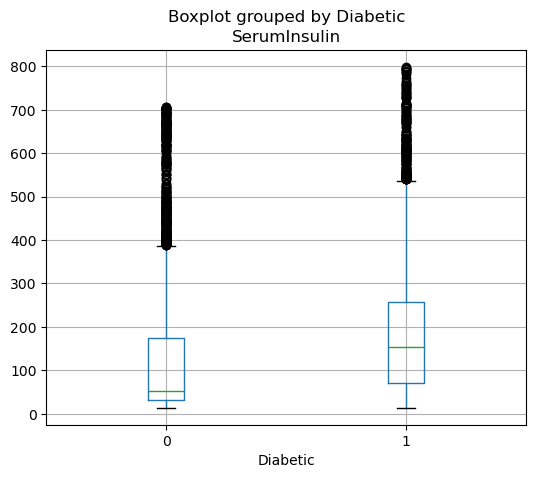

Unique values: 15000


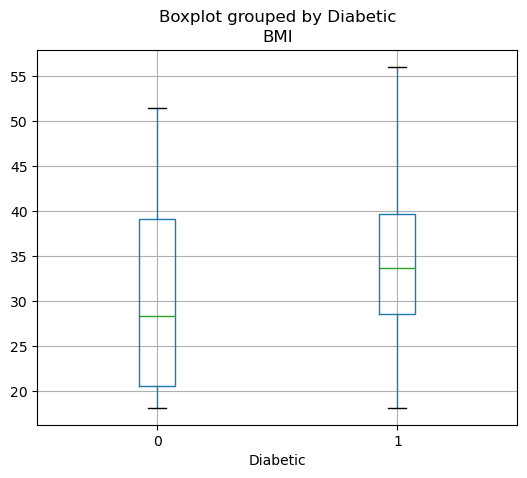

Unique values: 14999


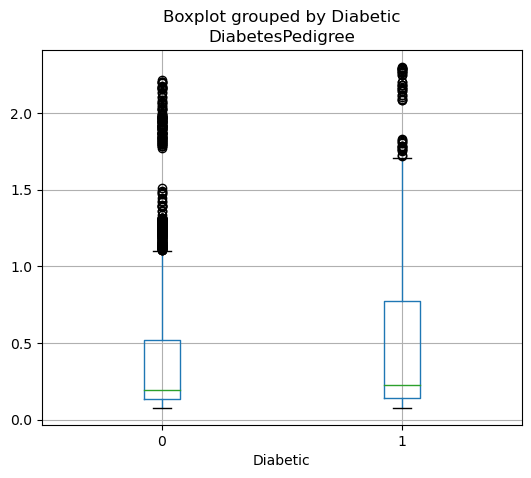

Unique values: 56


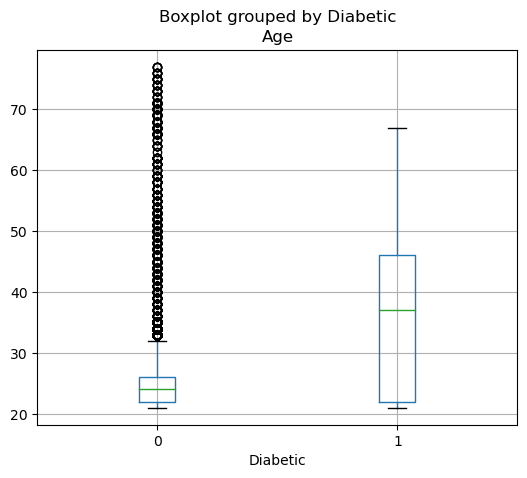

In [6]:
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

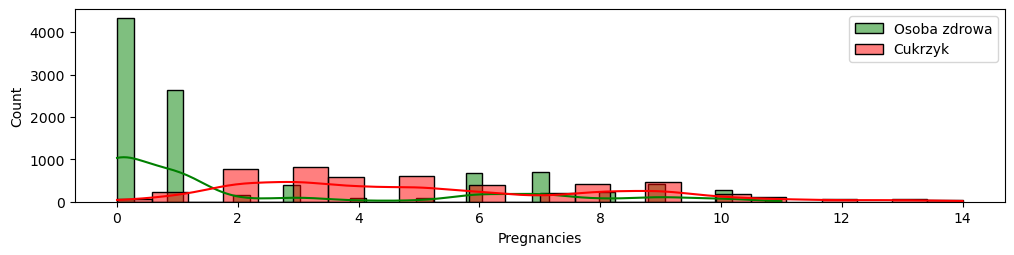

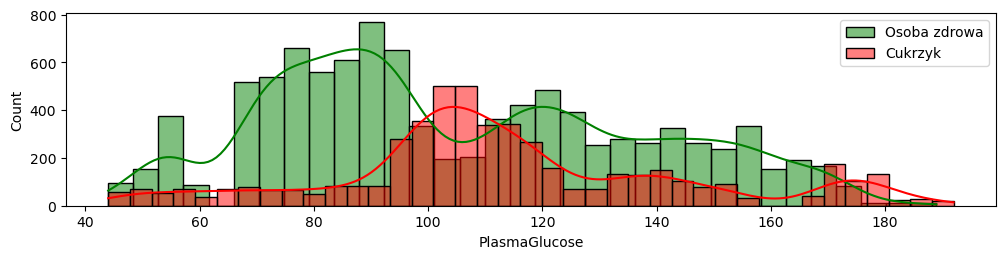

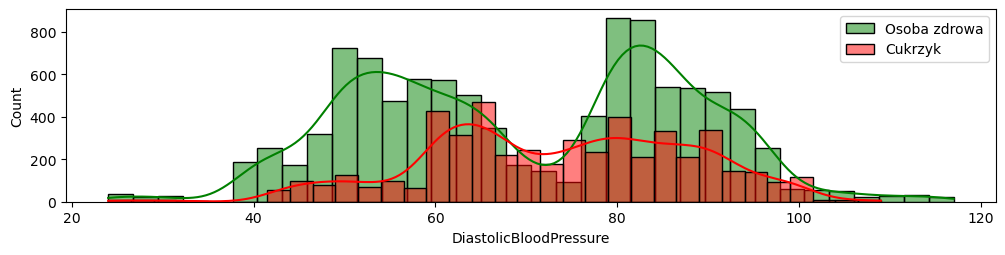

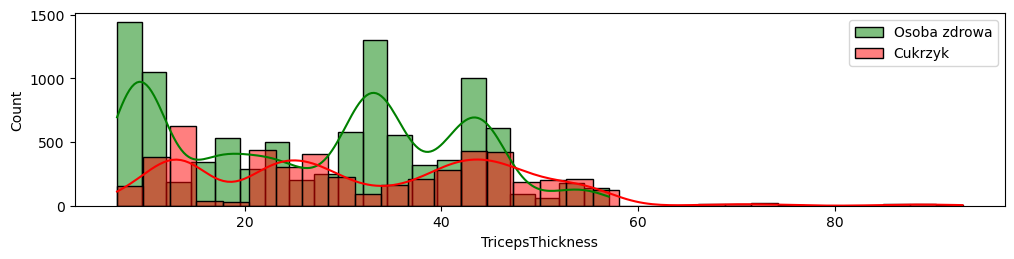

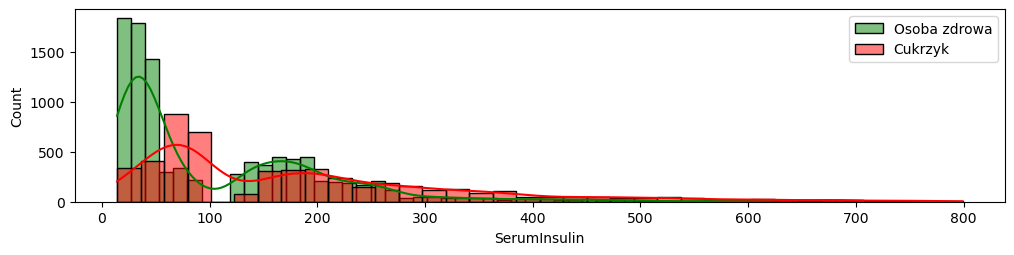

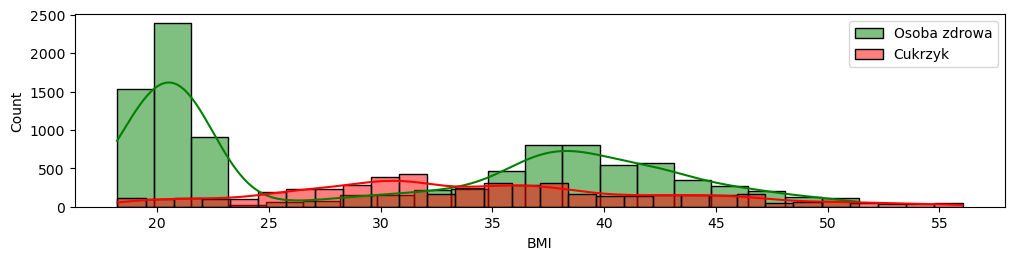

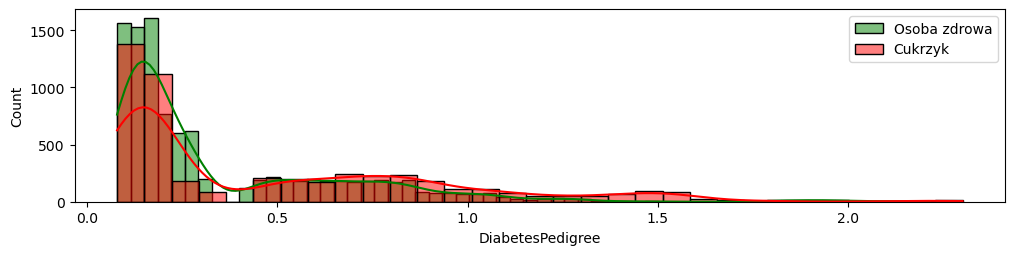

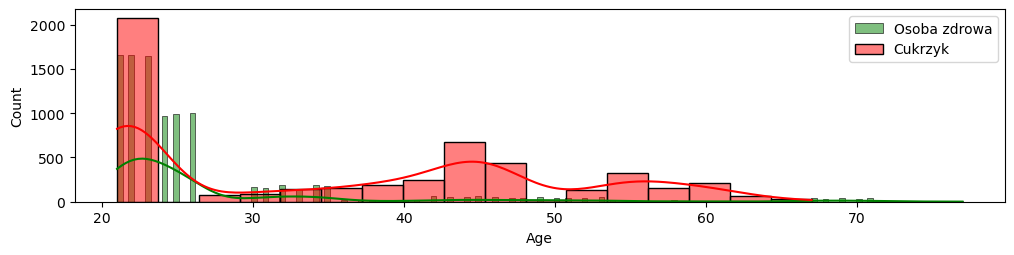

In [7]:
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    sns.histplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

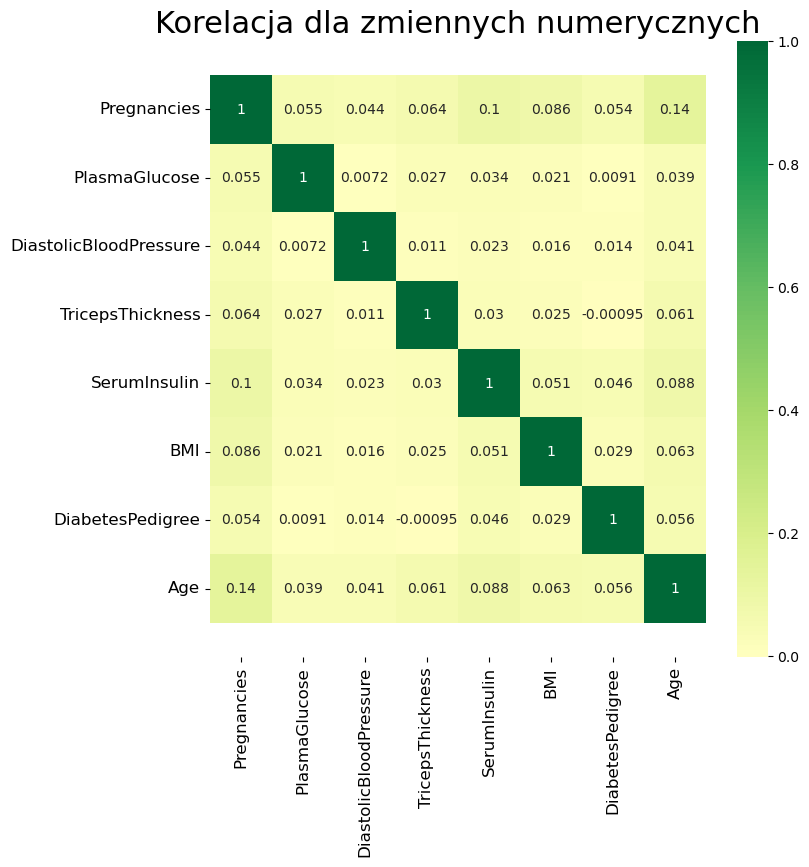

In [8]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [9]:
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [11]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

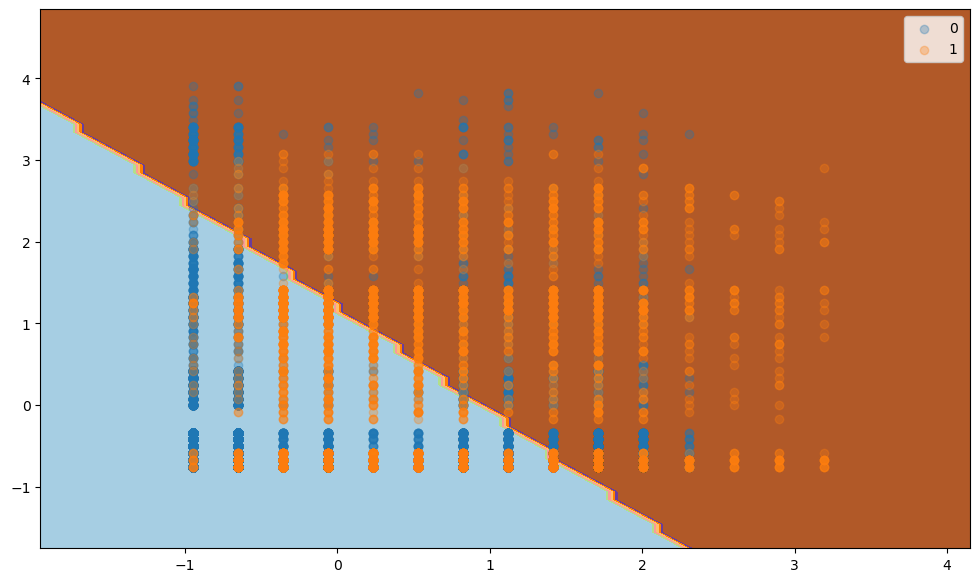

In [12]:
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [13]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


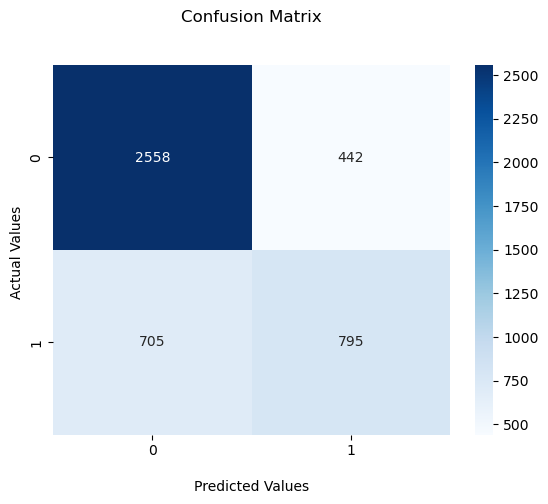

In [14]:
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [15]:
print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [16]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



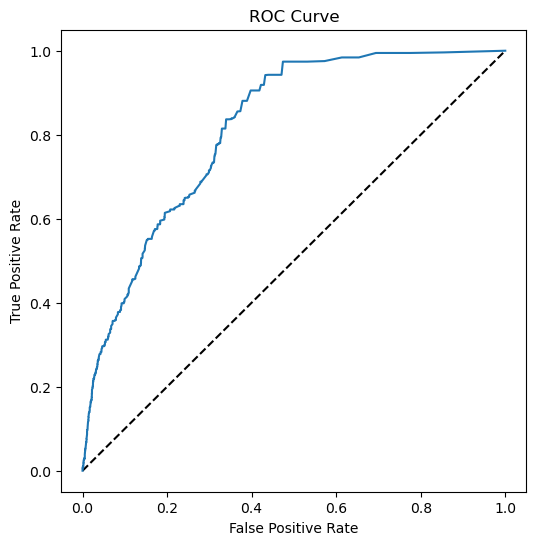

AUC: 0.8164931111111111


In [17]:
# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

In [18]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



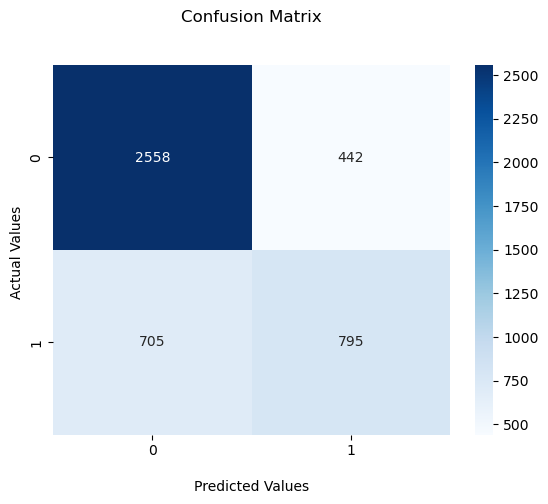

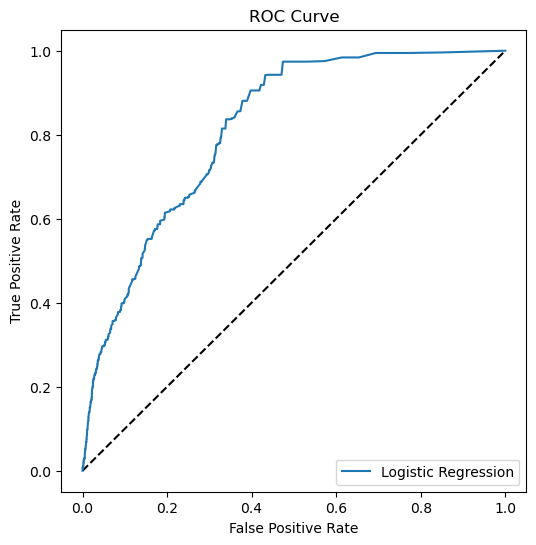

C:\Users\mateu\AppData\Local\Temp\ipykernel_6316\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [19]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

# ZADANIE

Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

In [20]:
l1_liblinear_1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
l1_liblinear_1.fit(X_train_standardized, y_train)
l1_liblinear_C = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01)
l1_liblinear_C.fit(X_train_standardized, y_train)

l1_saga_1 = LogisticRegression(penalty = 'l1', solver = 'saga')
l1_saga_1.fit(X_train_standardized, y_train)
l1_saga_C = LogisticRegression(penalty = 'l1', solver = 'saga', C = 0.01)
l1_saga_C.fit(X_train_standardized, y_train)

l2_liblinear_1 = LogisticRegression(penalty = 'l2', solver = 'liblinear')
l2_liblinear_1.fit(X_train_standardized, y_train)
l2_liblinear_C = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01)
l2_liblinear_C.fit(X_train_standardized, y_train)

l2_newton_cg_1 = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
l2_newton_cg_1.fit(X_train_standardized, y_train)
l2_newton_cg_C = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 0.01)
l2_newton_cg_C.fit(X_train_standardized, y_train)

l2_sag_1 = LogisticRegression(penalty = 'l2', solver = 'sag')
l2_sag_1.fit(X_train_standardized, y_train)
l2_sag_C = LogisticRegression(penalty = 'l2', solver = 'sag', C = 0.01)
l2_sag_C.fit(X_train_standardized, y_train)

l2_saga_1 = LogisticRegression(penalty = 'l2', solver = 'saga')
l2_saga_1.fit(X_train_standardized, y_train)
l2_saga_C = LogisticRegression(penalty = 'l2', solver = 'saga', C = 0.01)
l2_saga_C.fit(X_train_standardized, y_train)

elasticnet_saga_1 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio=0.3)
elasticnet_saga_1.fit(X_train_standardized, y_train)
elasticnet_saga_C = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio=0.7)
elasticnet_saga_C.fit(X_train_standardized, y_train)

LogisticRegression(l1_ratio=0.7, penalty='elasticnet', solver='saga')

In [21]:
modele = [l1_liblinear_1,
l1_liblinear_C,
l1_saga_1,
l1_saga_C,
l2_liblinear_1,
l2_liblinear_C,
l2_newton_cg_1,
l2_newton_cg_C,
l2_sag_1,
l2_sag_C,
l2_saga_1,
l2_saga_C,
elasticnet_saga_1,
elasticnet_saga_C
]

labels = [
'l1_liblinear_1',
'l1_liblinear_C',
'l1_saga_1',
'l1_saga_C',
'l2_liblinear_1',
'l2_liblinear_C',
'l2_newton_cg_1',
'l2_newton_cg_C',
'l2_sag_1',
'l2_sag_C',
'l2_saga_1',
'l2_saga_C',
'elasticnet_saga_1',
'elasticnet_saga_C'    
]
accuracy = []
precision = []
recall = []
F1_score_dla_testowych = []
F1_score_dla_treningowych = []

In [22]:
for model in modele:
    predictions_lr = model.predict(X_test_standardized)
    predictions_train = model.predict(X_train_standardized)
    accuracy.append(accuracy_score(y_test, predictions_lr).round(2))
    precision.append(precision_score(y_test, predictions_lr).round(2))
    recall.append(recall_score(y_test, predictions_lr).round(2))
    F1_score_dla_testowych.append(f1_score(y_test, predictions_lr).round(2))
    F1_score_dla_treningowych.append(f1_score(y_train, predictions_train).round(2))

df = pd.DataFrame(index = labels)
df['Accuracy'] = accuracy
df['Precision'] = precision
df['Recall'] = recall
df['F1_score dla testowych'] = recall
df['F1_score dla treningowych'] = recall
df

,Accuracy,Precision,Recall,F1_score dla testowych,F1_score dla treningowych
l1_liblinear_1,0.75,0.64,0.53,0.53,0.53
l1_liblinear_C,0.74,0.64,0.53,0.53,0.53
l1_saga_1,0.75,0.64,0.53,0.53,0.53
l1_saga_C,0.74,0.64,0.51,0.51,0.51
l2_liblinear_1,0.75,0.64,0.53,0.53,0.53
l2_liblinear_C,0.75,0.64,0.53,0.53,0.53
l2_newton_cg_1,0.75,0.64,0.53,0.53,0.53
l2_newton_cg_C,0.74,0.64,0.51,0.51,0.51
l2_sag_1,0.75,0.64,0.53,0.53,0.53
l2_sag_C,0.74,0.64,0.51,0.51,0.51


In [23]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



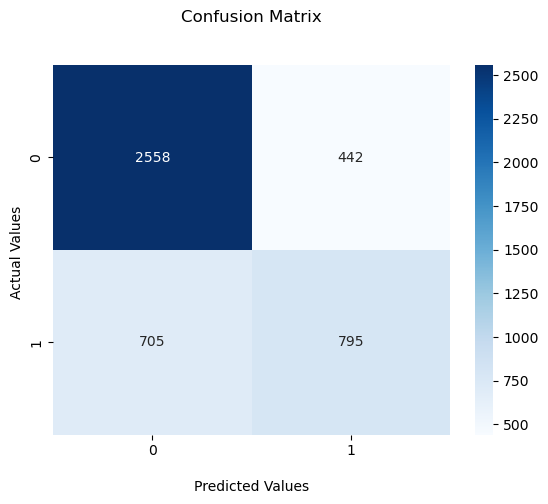

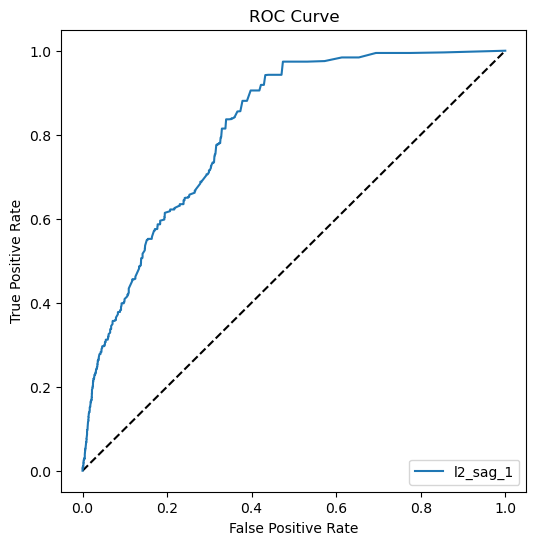

C:\Users\mateu\AppData\Local\Temp\ipykernel_6316\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,l2_sag_1,0.580928,0.816493


In [24]:
calculate_metrics(l2_sag_1, 'l2_sag_1', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



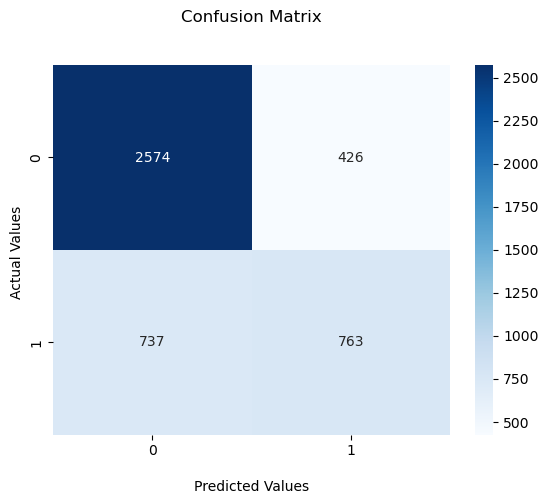

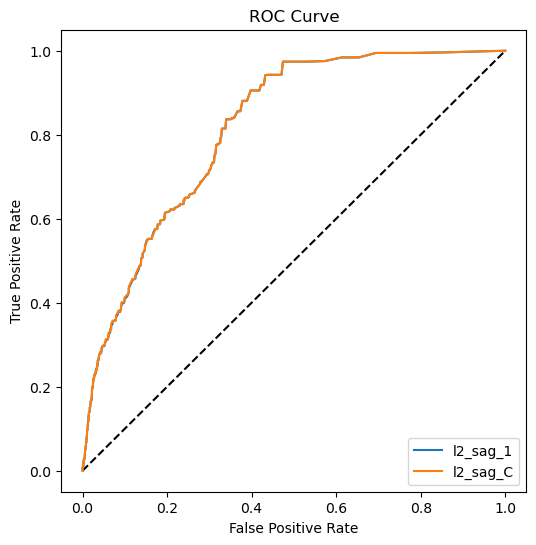

C:\Users\mateu\AppData\Local\Temp\ipykernel_6316\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,l2_sag_1,0.580928,0.816493
1,l2_sag_C,0.567497,0.816640


In [25]:
calculate_metrics(l2_sag_C, 'l2_sag_C', X_test_standardized, y_test)

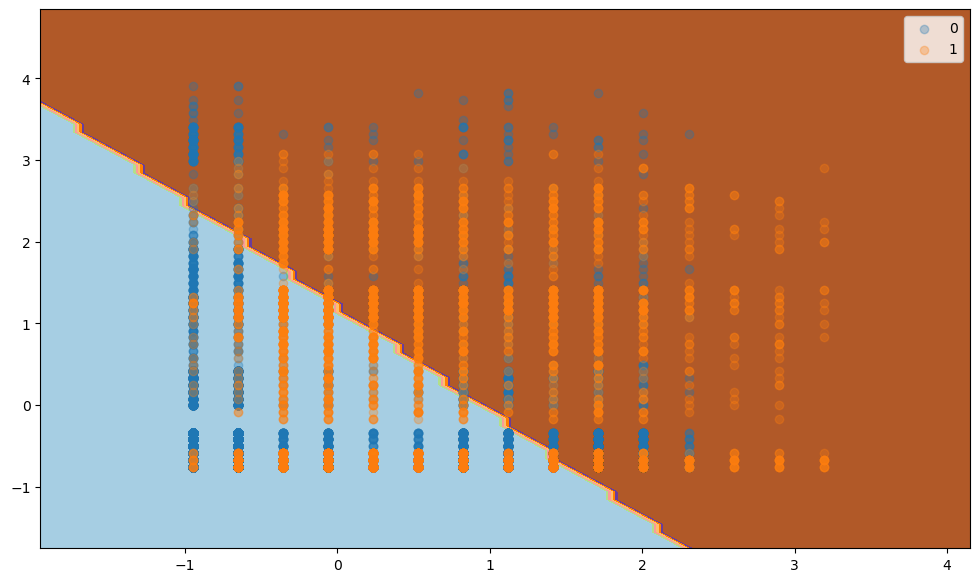

In [26]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

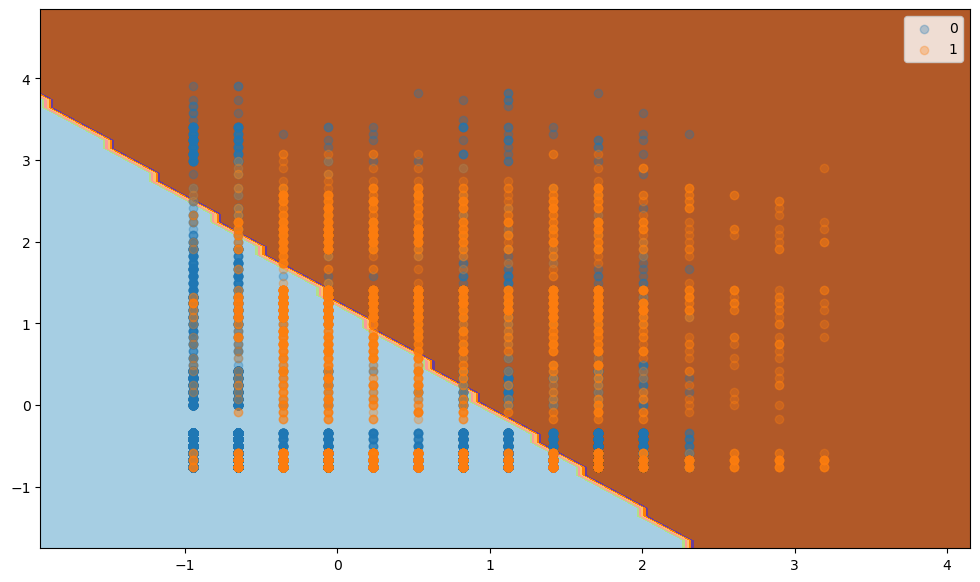

In [27]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=l2_sag_C)